In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats as st
import scipy.stats as stats
import patsy
import itertools
from IPython.display import display, HTML
from sklearn import linear_model
from sklearn.model_selection import KFold
from ipywidgets import interact
import ipywidgets as widgets
import warnings

%matplotlib inline
plt.style.use('seaborn-white')

In [4]:
sale_hist = pd.read_csv('C:/Users/mehrn/OneDrive/Desktop/ML/HelloWorld/SaleHistory.csv')
call_hist = pd.read_csv('C:/Users/mehrn/OneDrive/Desktop/ML/HelloWorld/OBCallHistory.csv')
customer_hist = pd.read_csv('C:/Users/mehrn/OneDrive/Desktop/ML/HelloWorld/CustomerHistory.csv')

In [14]:
df_combine = customer_hist.merge(sale_hist, how='left', left_on='userid', right_on='userid')
# df_combine.info()
print('df_combine', df_combine.shape)
# df_combine.head(24)
df = pd.DataFrame(df_combine.merge(call_hist, how='left', left_on='PhoneNumber_hashed', right_on='PhoneNumber_hashed'))
# df.info()
print('df', df.shape)

df_combine (12010, 54)
df (12010, 58)


In [16]:
#2. Variable sold
# datetime.strptime("28FEB2018:10:06:33.17", "%d%b%Y:%H:%M:%S.%f")
fmt = '%d%b%Y:%H:%M:%S.%f'
df['saledatetime_as_time_format'] = pd.to_datetime(df['saledatetime'], format= fmt)
df['accountcreationdatetime_as_time_format'] = pd.to_datetime(df['accountcreationdatetime'], format=fmt)
df['duration'] = df['saledatetime_as_time_format']  - df['accountcreationdatetime_as_time_format']

df['sold'] = ""

for i in range(len(df.duration)):
    
    if df.duration[i].days> 45:
        df.sold[i]= 0
    else:
        df.sold[i]= 1

# print(df.sold)

C:\Users\mehrn\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\mehrn\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [18]:
#3. Variable high_credit

df['high_credit'] = ""
med = df['CreditScore1'].median()

for i in range(len(df)):
    
    if df.CreditScore1[i]> med :
        df.high_credit[i] = 1
    else:
        df.high_credit[i] = 0
        
# print('high_credit', len(df.high_credit))

C:\Users\mehrn\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mehrn\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [20]:
#4.
#calculating 80th percentile
# df['sorted_income'] = ""
# df.sorted_income = sorted(df.Income) #new variable that contains sorting income in ascending order
# index = int(len(df.sorted_income)*.8)
# eighty_percentile = df.sorted_income[index]

# Variable high_income
df['high_income'] = ""
eighty_percentile = df.Income.quantile(.80)

for i in range(len(df)):
    if df.Income[i] > eighty_percentile:
        df.high_income[i] = 1
    else:
        df.high_income[i] = 0  
        

# print(eighty_percentile)
# print('high_income', len(df.high_income))

C:\Users\mehrn\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\mehrn\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
#5. Sale conversion rates of customers:
#contacted
contacted_sold = 0
not_contacted_sold = 0
contacted = 0
not_contacted = 0

for i in range(len(df)):
    if df.Contacted[i] == 1 and df.sold[i]==1:
        contacted_sold += 1 
                
    if df.Contacted[i] == 0 and df.sold[i]==1 :
        not_contacted_sold += 1
        
    if df.Contacted[i] == 1:
        contacted += 1
        
    if df.Contacted[i] == 0:
        not_contacted += 1
        
        
attempted_sold = contacted_sold + not_contacted_sold 
attempted = contacted + not_contacted
not_attempted = len(df.Contacted) - attempted 
#???
not_attempted_sold = sum(df.sold)- attempted_sold

contacted_rate = (contacted_sold /contacted)*100
attempted_rate = (attempted_sold/attempted)*100
not_attempted_rate = (not_attempted_sold/not_attempted)*100
                     
print('contacted_rate = ', contacted_rate)
print('attempted_rate = ', attempted_rate)
print('not_attempted_rate = ', not_attempted_rate)

print('contacted_sold', contacted_sold)
print('not_contacted_sold', not_contacted_sold)
print('contacted', contacted)
print('not_contacted', not_contacted)
print('not_attempted', not_attempted)  
print('attempted', attempted)  
print('not_attempted_sold', not_attempted_sold)

print( contacted + not_contacted)

print(len(df.Contacted) == contacted + not_contacted + not_attempted)
print(len(call_hist) == contacted + not_contacted)

contacted_rate =  89.8215992354253
attempted_rate =  90.7101775443861
not_attempted_rate =  92.84646061814557
contacted_sold 5639
not_contacted_sold 1616
contacted 6278
not_contacted 1720
not_attempted 4012
attempted 7998
not_attempted_sold 3725
7998
True
True


In [57]:
#8

# Drop  rows missing data
df = df.dropna()
assert df.isna().sum().sum() == 0

y = y = pd.DataFrame(df['sold']).astype(float) 
# y = pd.to_numeric(df['sold']).astype(float) 
df['high_income'] = pd.to_numeric(df['high_income'])
df['high_credit'] = pd.to_numeric(df['high_credit'])

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X= df.drop(['sold', 'userid', 'CensusGeoRegionAddress','ModeDeviceType', 'PhoneType', 'ModeVehicleType',
              'accountcreationdatetime_as_time_format', 'duration', 'ServiceProvider',
             'MedianVehicleMileage', 'accountcreationdatetime', 'saledatetime_as_time_format', 
             'saledatetime', 'LeadSource', 'AgeCategory', 'InboundCallContact','StickerPrice', 
            'PhoneNumber_hashed','OBCallDateTime','advocate_id', 'CallDuration','BureauIncome','TotalInboundCallLength'], axis=1)

X = pd.DataFrame(X)

y

,sold
2,1.0
3,1.0
8,1.0
9,0.0
10,1.0
...,...
11992,1.0
12001,1.0
12003,1.0
12006,0.0


In [58]:
#Best subset selection

def get_models(k, X, y):
    """
    Fit all possible models that contain exactly k predictors.
    """
    # List all available predictors
    X_combos = itertools.combinations(list(X.columns), k)
    
    # Fit all models accumulating Residual Sum of Squares (RSS)
    models = []
    for X_label in X_combos:
        # Parse patsy formula
        X_smf = ' + '.join(X_label)
        f     = '{} ~ {}'.format(y.columns[0], '+'.join(p_all))
        # Fit model
        model = smf.ols(formula=f, data=pd.concat([X, y], axis=1)).fit()
        # Return results
        models += [(f, model)]
    return models


def min_rss(statsmodels):
    """Return model with lowest Residual Sum of Squares (RSS)"""
    return sorted(statsmodels, key=lambda tup: tup[1].ssr)[0]


def max_adjr2(statsmodels):
    """Return model with lowest R-squared"""
    return sorted(statsmodels, reverse=True, key=lambda tup: tup[1].rsquared_adj)[0]


def min_bic(statsmodels):
    """Return model with min Bayes' Information Criteria"""
    return sorted(statsmodels, reverse=False, key=lambda tup: tup[1].bic)[0]


def min_aic(statsmodels):
    """Return model with min Akaike's Information Criteria"""
    return sorted(statsmodels, reverse=False, key=lambda tup: tup[1].aic)[0]

In [59]:
def forward_stepwise(X, y, scorer='ssr', results=[(0, [])]):
    """Perform forward stepwise variable selection as described in
    An Introductions to Statistical Learning (p.207)
    Returns pandas dataframe object  with results for each step"""
    # List predictors that havent's been used so far
    p_all    = list(X.columns)
    p_used   = results[-1][1]
    p_unused = [p for p in p_all if p not in p_used]
    
    # Job done, exit recursion
    if not p_unused:
        scores = [r[0] for r in results]
        preds  = [r[1] for r in results]
        return pd.DataFrame({scorer: scores, 'predictors': preds}).drop(0)
    
    # Get score for each possible additional predictor
    r = []
    for p in p_unused:
        f     = '{} ~ {}'.format(y.columns[0], '+'.join([p]+p_used))
        # Fit model
        model = smf.ols(formula=f, data=pd.concat([X, y], axis=1)).fit()
        r    += [(model, [p]+p_used)]
    
    # Choose predictor which yields best score
    if scorer == 'ssr':
        best_model = sorted(r, key=lambda tup: tup[0].ssr)[0]
        best_score = (best_model[0].ssr, best_model[1])
    elif scorer == 'rsquared_adj':
        best_model = sorted(r, key=lambda tup: tup[0].rsquared_adj)[-1]
        best_score = (best_model[0].rsquared_adj, best_model[1])        
    elif scorer == 'bic':
        best_model = sorted(r, key=lambda tup: tup[0].bic)[0]
        best_score = (best_model[0].bic, best_model[1]) 
    elif scorer == 'aic':
        best_model = sorted(r, key=lambda tup: tup[0].aic)[0]
        best_score = (best_model[0].aic, best_model[1]) 
                        
    new_results = results + [best_score]
    # Recursive call to self
    return forward_stepwise(X, y, scorer, new_results)

In [68]:

def backward_stepwise(X, y, scorer='ssr', results=[]):
    """Perform backward stepwise variable selection 
    Returns pandas dataframe object  with results for each step"""
    # List predictors that havent's been used so far
    p_all = list(X.columns)

    # Check if we're starting out here
    if not results:
        # Fit model with all features
        f     = '{} ~ {}'.format(y.columns[0], '+'.join(p_all))
        model = smf.ols(formula=f, data=pd.concat([X, y], axis=1)).fit()
        
    # Begin backward stepwise recursion
        if scorer == 'ssr':
            return backward_stepwise(X, y, scorer, [(model.ssr, p_all)])
        if scorer == 'rsquared_adj':
            return backward_stepwise(X, y, scorer, [(model.rsquared_adj, p_all)])
        if scorer == 'bic':
            return backward_stepwise(X, y, scorer, [(model.bic, p_all)])
        if scorer == 'aic':
            return backward_stepwise(X, y, scorer, [(model.aic, p_all)])
    else:
        p_used = results[-1][1]
        
    # Job done, exit recursion
    if len(p_used) == 1:
        scores = [r[0] for r in results]
        preds  = [r[1] for r in results]
        return pd.DataFrame({scorer: scores, 'predictors': preds})   
    
    # Get rss score for each possible removed predictor
    r = []
    for p in p_used:
        p_test = [i for i in p_used if i != p]
        f     = '{} ~ {}'.format(y.columns[0], '+'.join(p_test))
        # Fit model
        model = smf.ols(formula=f, data=pd.concat([X, y], axis=1)).fit()
        r += [(model.ssr, p_test)]
         
   
    # Choose removal of predictor which yields best score
    if scorer == 'ssr':
        best_model = sorted(r, key=lambda tup: tup[0].ssr)[0]
        best_score = (best_model[0].ssr, best_model[1])
    elif scorer == 'rsquared_adj':
        best_model = sorted(r, key=lambda tup: tup[0].rsquared_adj)[-1]
        best_score = (best_model[0].rsquared_adj, best_model[1])        
    elif scorer == 'bic':
        best_model = sorted(r, key=lambda tup: tup[0].bic)[0]
        best_score = (best_model[0].bic, best_model[1]) 
    elif scorer == 'aic':
        best_model = sorted(r, key=lambda tup: tup[0].aic)[0]
        best_score = (best_model[0].aic, best_model[1]) 

    new_results = results + [best_score]
    # Recursive call to self
    return backward_stepwise(X, y, scorer, new_results)


def subset_analysis(df, scorer):
    """Renders results from forward_stepwise() and backward_stepwise()"""
    df['predictors_str'] = df['predictors'].astype(str)
    
    ax = sns.lineplot(x='predictors_str', y=scorer, data=df, sort=False)
    plt.xticks(rotation=90)
    plt.show();
    
    if scorer == 'rsquared_adj':
        display(df[df[scorer] ==  df[scorer].max()].drop('predictors_str', axis=1))
    else:
        display(df[df[scorer] ==  df[scorer].min()].drop('predictors_str', axis=1))


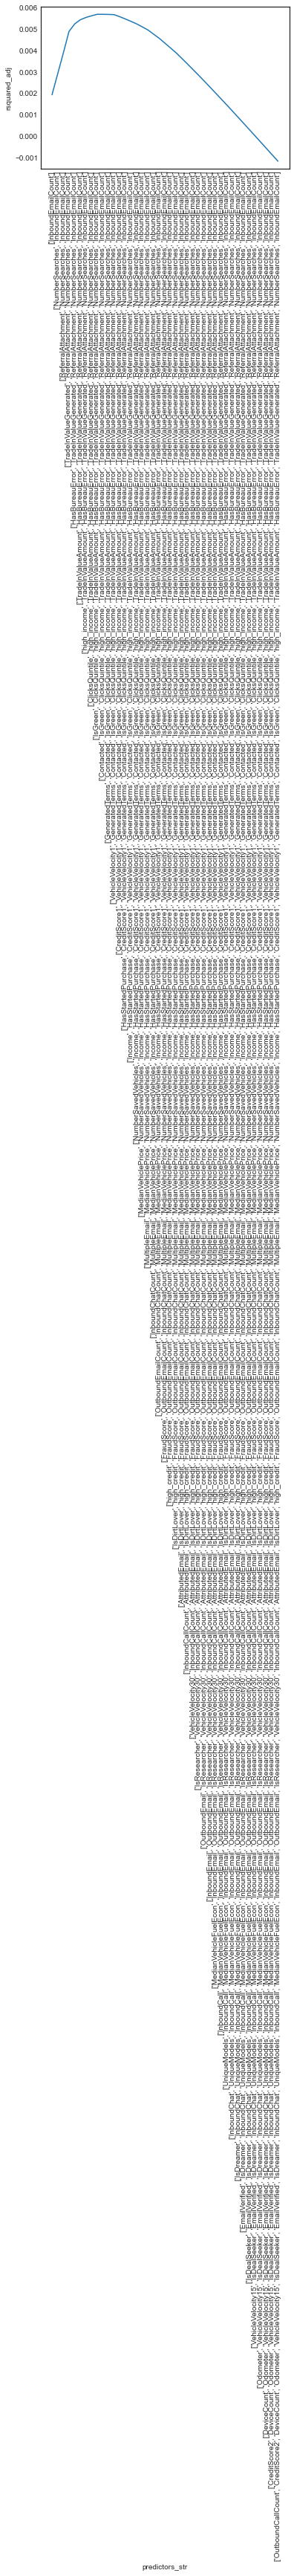

,rsquared_adj,predictors
9,0.005694,"[IsGreen, ClicksQuintile, high_income, TradeIn..."
10,0.005694,"[Contacted, IsGreen, ClicksQuintile, high_inco..."


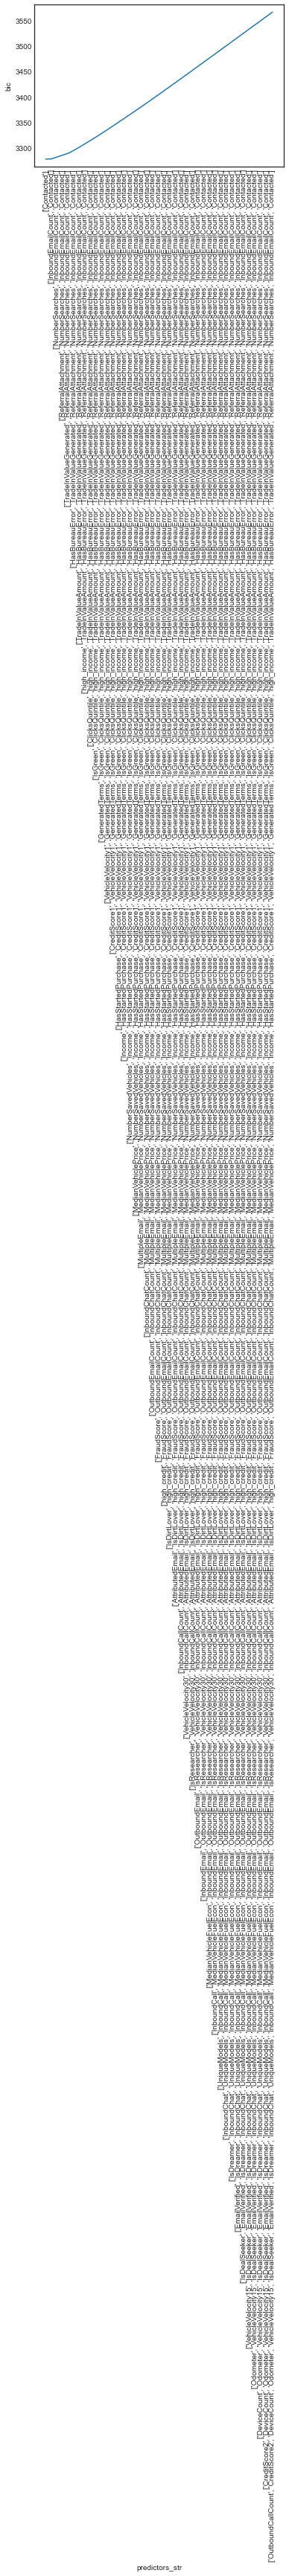

,bic,predictors
1,3277.250667,[Contacted]


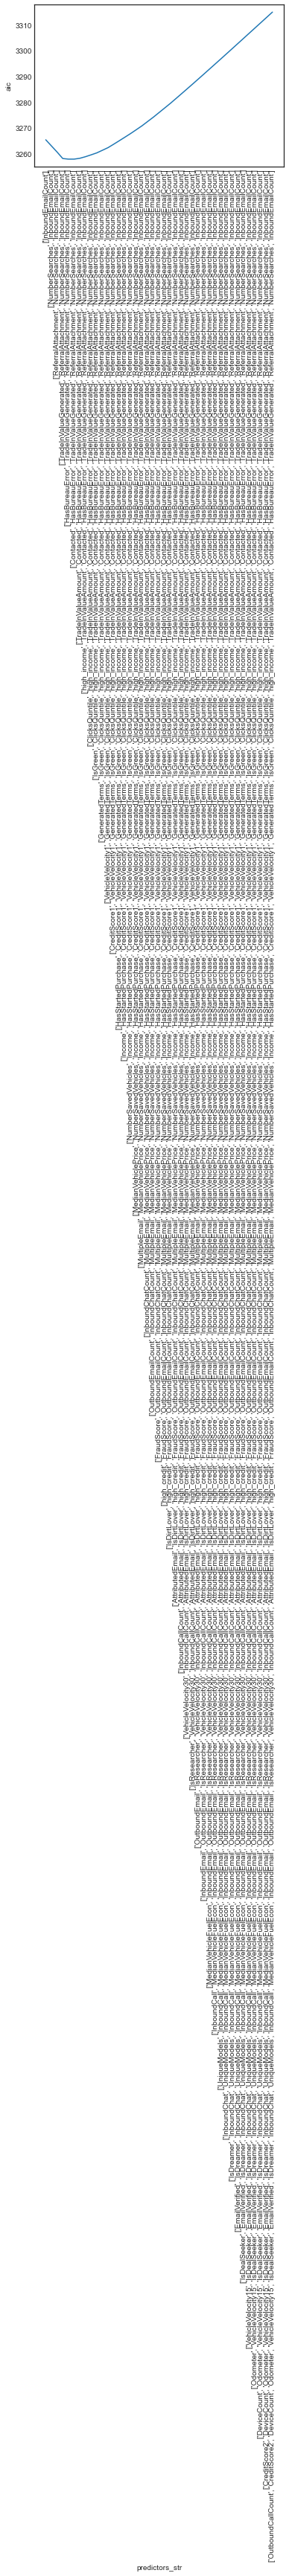

,aic,predictors
5,3257.884549,"[HasBureauError, TradeInValueGenerated, Referr..."
6,3257.884549,"[Contacted, HasBureauError, TradeInValueGenera..."


In [70]:
# adjr2
# ------------------------------------------------
display(HTML('<h4>Adjusted R^2</h4>'))
scorer = 'rsquared_adj'
subset_analysis(forward_stepwise(X, y, scorer=scorer), scorer)

# Bayes' Information Criteria (BIC)
# ------------------------------------------------
display(HTML('<h4>Bayes\' Information Criteria</h4>'))
scorer = 'bic'
subset_analysis(forward_stepwise(X, y, scorer=scorer), scorer)

# Akaike's Information Criteria (AIC/ C_p)
# ------------------------------------------------
display(HTML('<h4>Akaike\'s Information Criteria</h4>'))
scorer = 'aic'
subset_analysis(forward_stepwise(X, y, scorer=scorer), scorer)